# Modeling with Random Forest Classifer

#### We build multiple Random Forest Classifer Models to Train on cleaned text and variables: 
#### Relevancy_score (highly relevant (4), very relevant (3), relevant (2), minimally relevant (1), not relevant (0))
#### Treatment_Number (user receives treatment (1), user does not receive treatment (0))
#### Recommendation_Score (user recommends treatment (1), user does not recommend treatment (0))

In [1]:
import numpy as np
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
from seaborn import set_style
set_style("whitegrid")
import seaborn as sns

In [2]:
data_df = pd.read_csv("enumerated_scraped_comments.csv")

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix,  classification_report
from sklearn.model_selection import train_test_split

In [10]:
#vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=100, test_size=0.2, stratify=y1)
X_train_vect = vectorizer1.fit_transform(X_train)

In [11]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=100)
clf.fit(X_train_vect, y1_train)

RandomForestClassifier(random_state=100)

In [12]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y1_pred = clf.predict(X_test_vect)

In [13]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.5993265993265994

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.92      0.77       157
           1       0.38      0.32      0.35        77
           2       0.64      0.14      0.23        49
           3       1.00      0.08      0.14        13
           4       0.00      0.00      0.00         1

    accuracy                           0.60       297
   macro avg       0.54      0.29      0.30       297
weighted avg       0.60      0.60      0.54       297



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

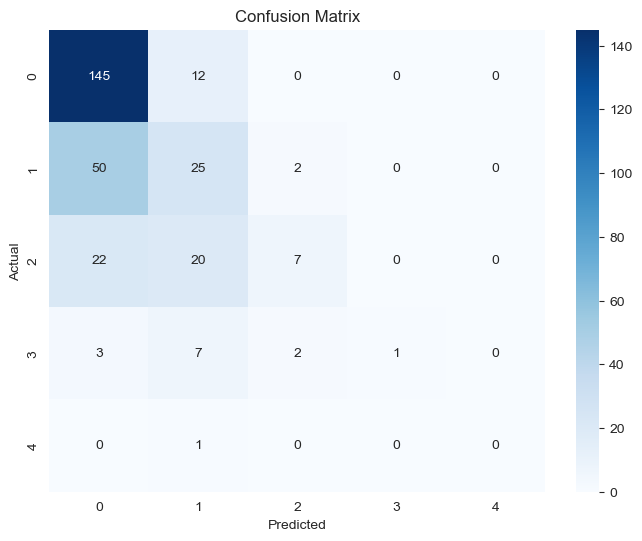

In [14]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [15]:
#Vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=200, test_size=0.2,stratify=y2)
X_train_vect = vectorizer1.fit_transform(X_train)

In [16]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=200)
clf.fit(X_train_vect, y2_train)

RandomForestClassifier(random_state=200)

In [17]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y2_pred = clf.predict(X_test_vect)

In [18]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.8417508417508418

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.98      0.90       219
           1       0.90      0.45      0.60        78

    accuracy                           0.84       297
   macro avg       0.87      0.72      0.75       297
weighted avg       0.85      0.84      0.82       297



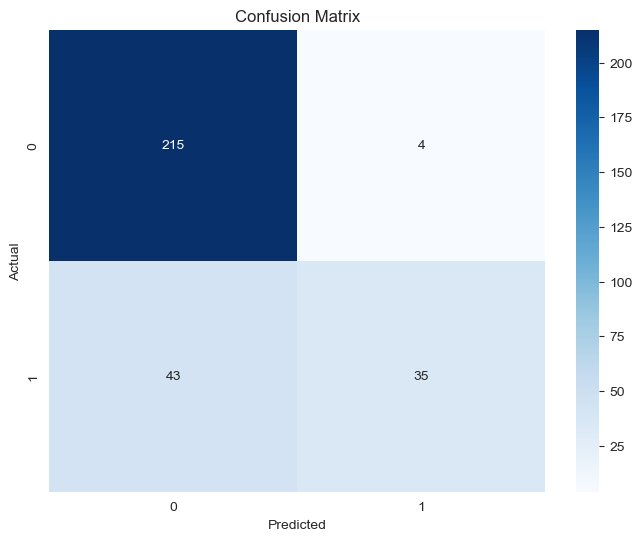

In [19]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [20]:
#Vectorize text and create a train test split 
vectorizer1 = CountVectorizer()
vectors = vectorizer1.fit_transform(data_df.Comment)
feature_names = vectorizer1.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=300, test_size=0.2,stratify=y3)
X_train_vect = vectorizer1.fit_transform(X_train)

In [21]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=300)
clf.fit(X_train_vect, y3_train)

RandomForestClassifier(random_state=300)

In [22]:
# Make predictions
X_test_vect = vectorizer1.transform(X_test)
y3_pred = clf.predict(X_test_vect)

In [23]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       264
           1       0.00      0.00      0.00        33

    accuracy                           0.89       297
   macro avg       0.44      0.50      0.47       297
weighted avg       0.79      0.89      0.84       297



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

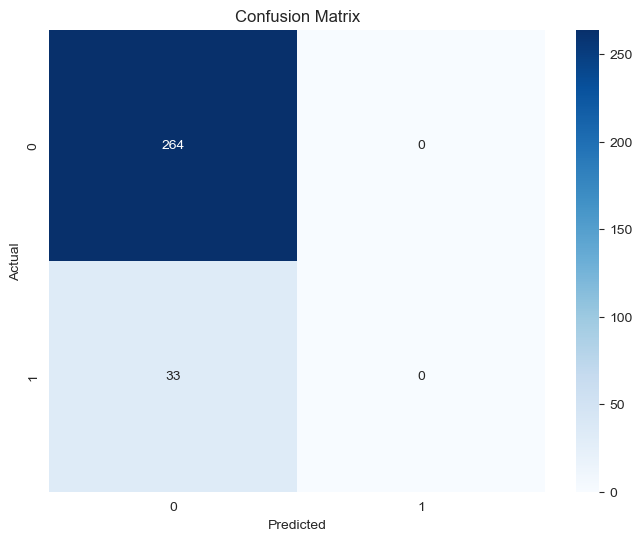

In [24]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#Vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y1 = data_df.Relevancy_Score
X_train, X_test, y1_train, y1_test = train_test_split(X, y1, random_state=400, test_size=0.2,stratify=y1)
X_train_vect = vectorizer2.fit_transform(X_train)

In [26]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=400)
clf.fit(X_train_vect, y1_train)

RandomForestClassifier(random_state=400)

In [27]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y1_pred = clf.predict(X_test_vect)

In [28]:
# Evaluate the model
print("Accuracy:", accuracy_score(y1_test, y1_pred))
print("\nClassification Report:\n", classification_report(y1_test, y1_pred))

Accuracy: 0.6195286195286195

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.98      0.77       157
           1       0.57      0.36      0.44        77
           2       0.33      0.04      0.07        49
           3       0.00      0.00      0.00        13
           4       0.00      0.00      0.00         1

    accuracy                           0.62       297
   macro avg       0.31      0.28      0.26       297
weighted avg       0.54      0.62      0.54       297



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

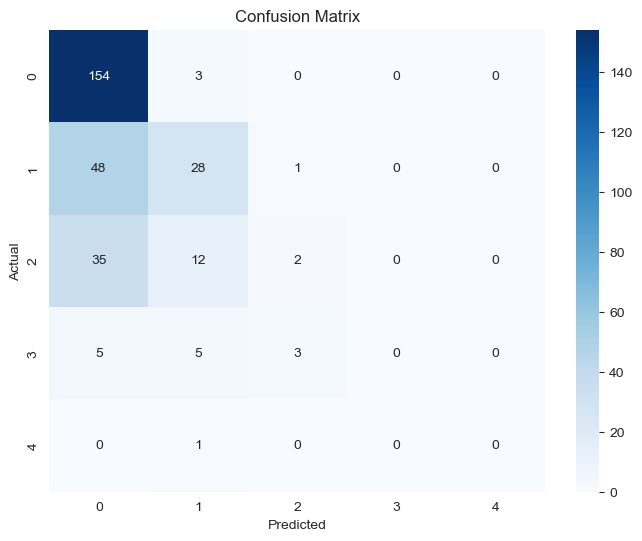

In [29]:
#Produce the confusion matrix 
cm = confusion_matrix(y1_test, y1_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [32]:
#Vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y2 = data_df.Treatment_Number
X_train, X_test, y2_train, y2_test = train_test_split(X, y2, random_state=500, test_size=0.2,stratify=y2)
X_train_vect = vectorizer2.fit_transform(X_train)

In [33]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=500)
clf.fit(X_train_vect, y2_train)

RandomForestClassifier(random_state=500)

In [34]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y2_pred = clf.predict(X_test_vect)

In [35]:
# Evaluate the model
print("Accuracy:", accuracy_score(y2_test, y2_pred))
print("\nClassification Report:\n", classification_report(y2_test, y2_pred))

Accuracy: 0.8417508417508418

Classification Report:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90       219
           1       1.00      0.40      0.57        78

    accuracy                           0.84       297
   macro avg       0.91      0.70      0.74       297
weighted avg       0.87      0.84      0.82       297



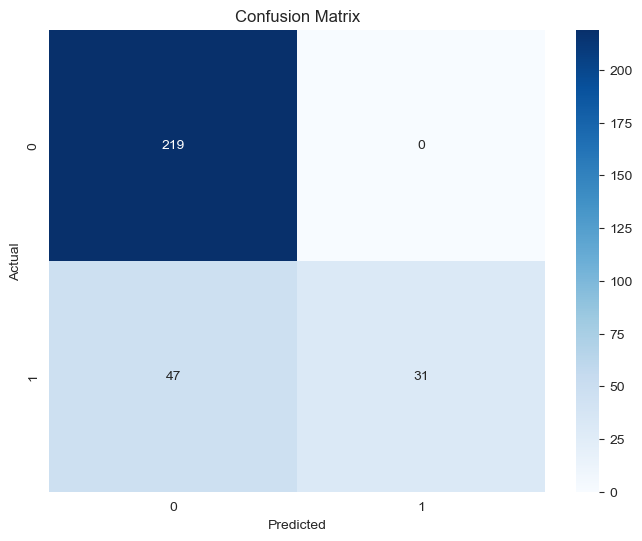

In [36]:
#Produce the confusion matrix 
cm = confusion_matrix(y2_test, y2_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [37]:
#Vectorize text and create a train test split 
vectorizer2 = TfidfVectorizer()
vectors = vectorizer2.fit_transform(data_df.Comment)
feature_names = vectorizer2.get_feature_names_out()
X_array = vectors.toarray()
X = data_df.Comment
y3 = data_df.Recommendation_Score
X_train, X_test, y3_train, y3_test = train_test_split(X, y3, random_state=600, test_size=0.2, stratify=y3)
X_train_vect = vectorizer2.fit_transform(X_train)

In [38]:
#Create Instance of Random Forest Model
clf = RandomForestClassifier(n_estimators=100, random_state=600)
clf.fit(X_train_vect, y3_train)

RandomForestClassifier(random_state=600)

In [39]:
# Make predictions
X_test_vect = vectorizer2.transform(X_test)
y3_pred = clf.predict(X_test_vect)

In [40]:
# Evaluate the model
print("Accuracy:", accuracy_score(y3_test, y3_pred))
print("\nClassification Report:\n", classification_report(y3_test, y3_pred))

Accuracy: 0.8888888888888888

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       264
           1       0.00      0.00      0.00        33

    accuracy                           0.89       297
   macro avg       0.44      0.50      0.47       297
weighted avg       0.79      0.89      0.84       297



/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/envs/erdos_may_2024_v2/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

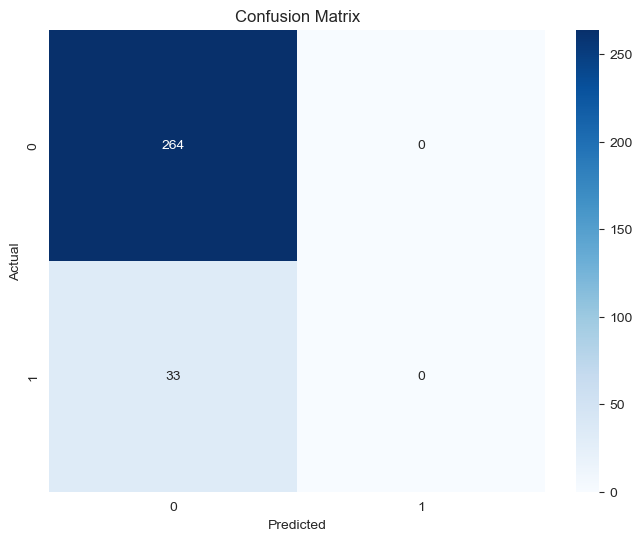

In [41]:
#Produce the confusion matrix 
cm = confusion_matrix(y3_test, y3_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()